<a href="https://colab.research.google.com/github/solee328/LikeLion_EDA/blob/min/Time_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Time.csv
2020.1.20 부터 2020.4.30 기간 중 코로나19 관련 검사 수 / 음성 / 양성 / 격리해제 / 사망 에 관한 데이터

---
**EDA 과정**
*   'time' 열의 세부 사항보다는 날짜에 의한 데이터를 위해 해당 열 삭제
*   날짜에 의한 각 데이터를 lineplot으로 확인
*   확진자를 기준으로 비율을 확인





In [3]:
time = pd.read_csv('/content/drive/MyDrive/colab/Time.csv') # Time.csv 로드

In [4]:
print(time.shape)
print(time.head()) # 상위 5개 행

(102, 7)
         date  time  test  negative  confirmed  released  deceased
0  2020-01-20    16     1         0          1         0         0
1  2020-01-21    16     1         0          1         0         0
2  2020-01-22    16     4         3          1         0         0
3  2020-01-23    16    22        21          1         0         0
4  2020-01-24    16    27        25          2         0         0


In [5]:
time = time.drop('time',axis=1) # 날짜를 기준으로 진행할 것이기에 time 열은 삭제해도 무관
time_idx = time.set_index('date') # date를 인덱스로 재정의
print(time.head())
print(time_idx.head())

         date  test  negative  confirmed  released  deceased
0  2020-01-20     1         0          1         0         0
1  2020-01-21     1         0          1         0         0
2  2020-01-22     4         3          1         0         0
3  2020-01-23    22        21          1         0         0
4  2020-01-24    27        25          2         0         0
            test  negative  confirmed  released  deceased
date                                                     
2020-01-20     1         0          1         0         0
2020-01-21     1         0          1         0         0
2020-01-22     4         3          1         0         0
2020-01-23    22        21          1         0         0
2020-01-24    27        25          2         0         0


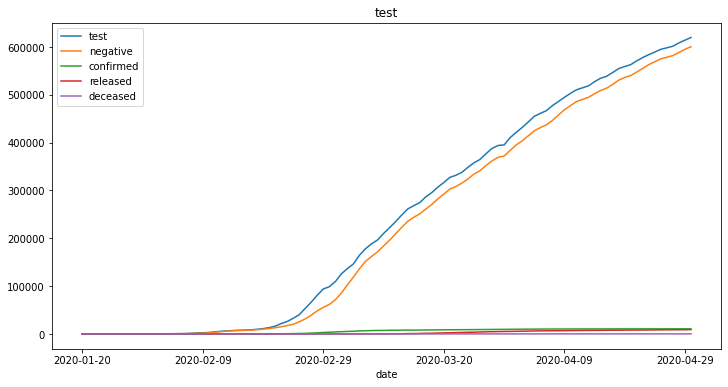

In [6]:
# date를 기준으로 각 데이터를 확인
time_idx.plot(title = 'test',figsize = (12,6))

In [7]:
# 위의 그래프로 보아, 검사 수와 음성 수가 다른 지표에 비해 과도하게 많다.
# 따라서 의미있는 데이터로 변환하기 위해, 각각을 비율로 삼아 데이터를 재구성하기로 하였다.

In [8]:
# 기존의 데이터를 이용해, 비율에 대한 데이터로 재구성
time_ratio = time_idx.assign(RatioOfConfirmed = lambda x :(x['confirmed']/x['test'])*100, # 양성 / 검사 = 검사 대비 확진 비율
                          RatioOfNegative = lambda x :(x['negative']/x['test'])*100, # 음성 / 검사 = 검사 대비 음성 비율
                          RatioOfReleased = lambda x :(x['released']/x['confirmed'])*100, # 격리해제 / 양성
                          RatioOfDeceased = lambda x :(x['deceased']/x['confirmed'])*100) # 사망 / 양성
time_ratio.head()

,test,negative,confirmed,released,deceased,RatioOfConfirmed,RatioOfNegative,RatioOfReleased,RatioOfDeceased
date,,,,,,,,,
2020-01-20,1,0,1,0,0,100.000000,0.000000,0.0,0.0
2020-01-21,1,0,1,0,0,100.000000,0.000000,0.0,0.0
2020-01-22,4,3,1,0,0,25.000000,75.000000,0.0,0.0
2020-01-23,22,21,1,0,0,4.545455,95.454545,0.0,0.0
2020-01-24,27,25,2,0,0,7.407407,92.592593,0.0,0.0


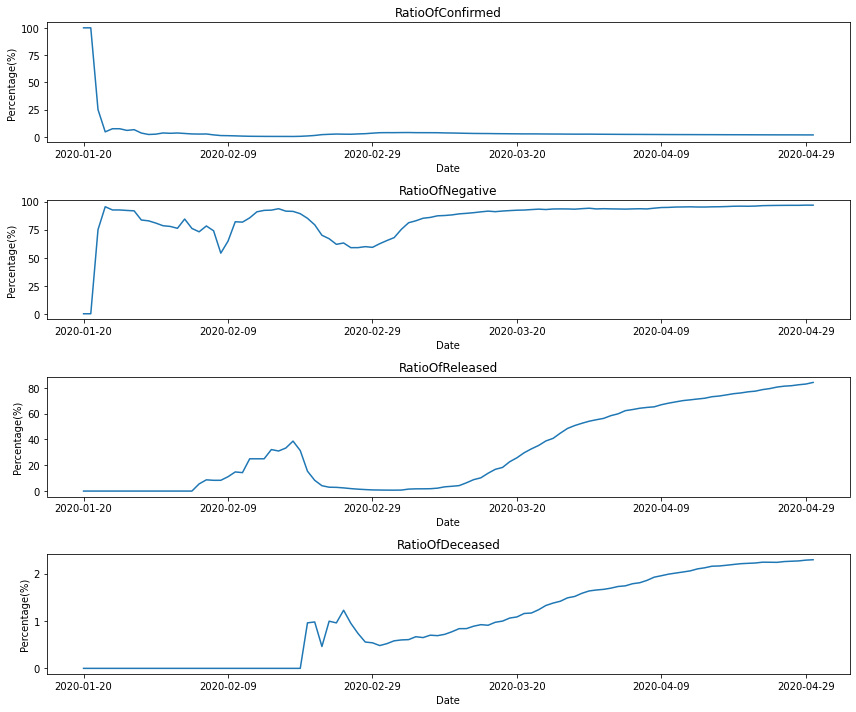

In [9]:
# 각 변수와 수명간의 관계
fig, axes = plt.subplots(nrows=4,figsize = (12,10))

time_ratio['RatioOfConfirmed'].plot(title = 'RatioOfConfirmed',ax = axes[0])
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Percentage(%)')

# 위와 동일한 정보를 Seaborn을 활용해 확인 + 각 점의 크기를 수명에 의해 결정
time_ratio['RatioOfNegative'].plot(title = 'RatioOfNegative',ax = axes[1])
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Percentage(%)')

time_ratio['RatioOfReleased'].plot(title = 'RatioOfReleased',ax = axes[2])
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Percentage(%)')

time_ratio['RatioOfDeceased'].plot(title = 'RatioOfDeceased',ax = axes[3])
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Percentage(%)')
plt.tight_layout()

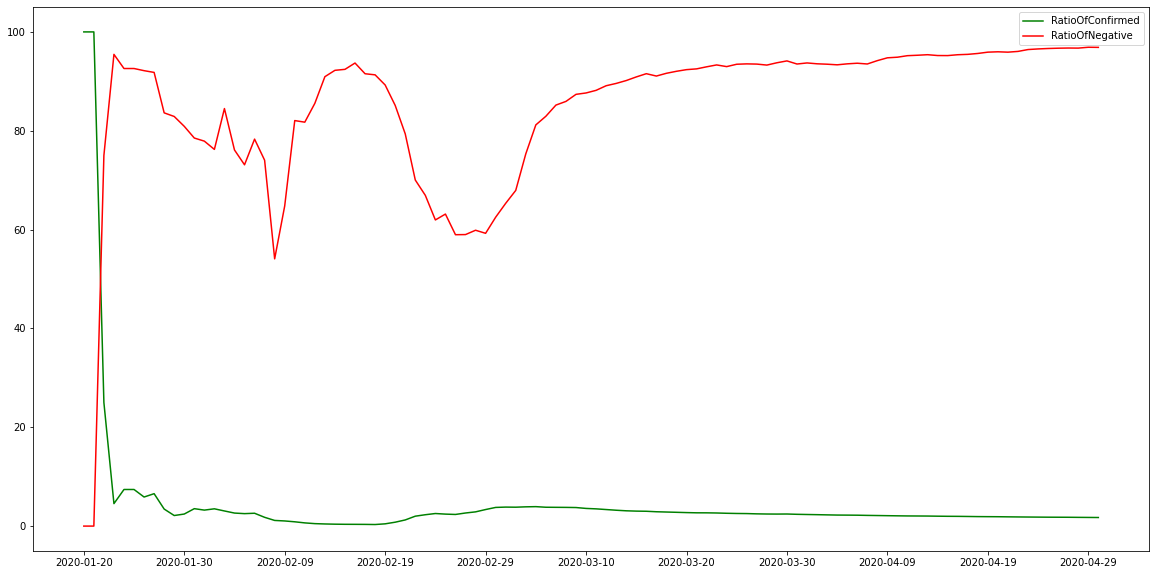

In [27]:
# 동일한 기준으로 재구성한 데이터 비교 (By test)
fig, axes1 = plt.subplots(figsize = (20,10))
axes1.plot(time_ratio['RatioOfConfirmed'],color = 'green', label = 'RatioOfConfirmed')
axes1.plot(time_ratio['RatioOfNegative'],color = 'red', label = 'RatioOfNegative')
axes1.legend()
plt.xticks(np.arange(0,102,10))
plt.show()

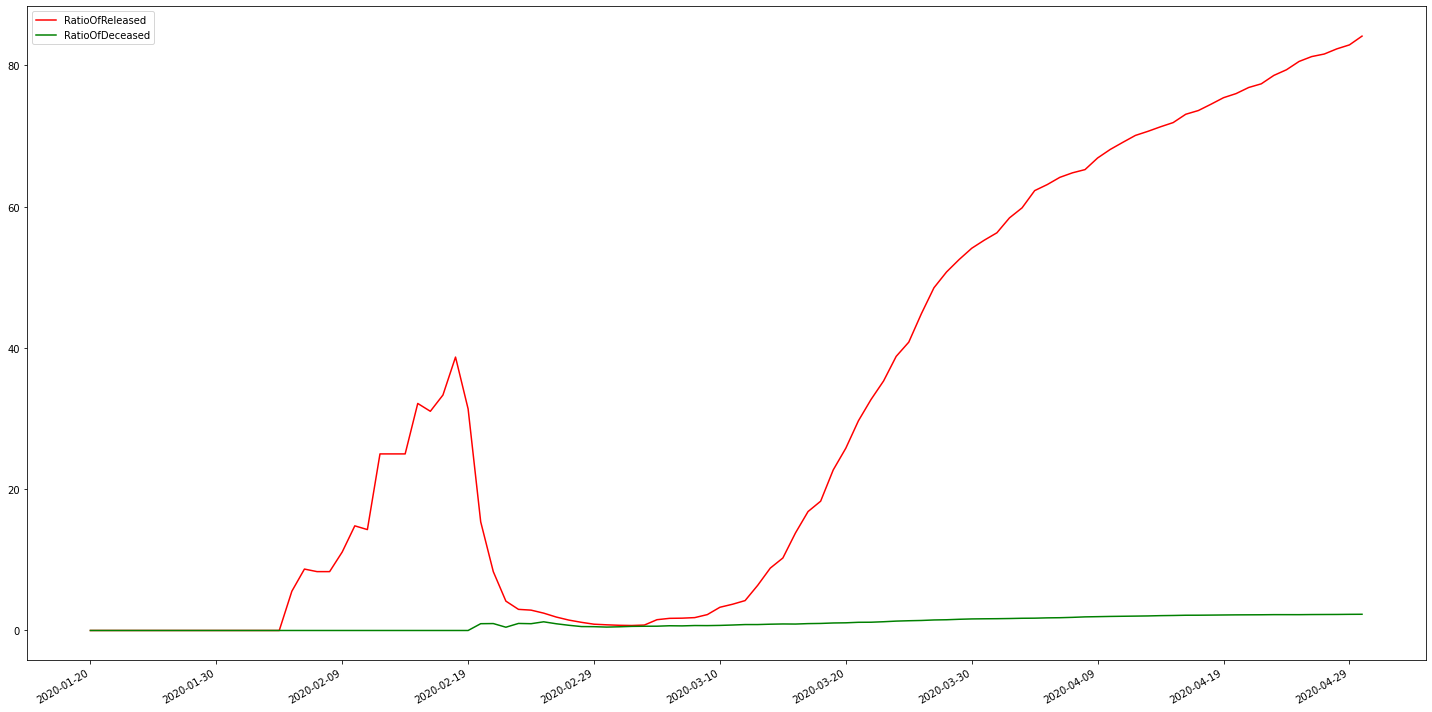

In [28]:
# 동일한 기준으로 재구성한 데이터 비교 (By Confirmed)
fig, axes2 = plt.subplots(figsize = (20,10))
axes2.plot(time_ratio['RatioOfReleased'],color = 'red', label = 'RatioOfReleased')
axes2.plot(time_ratio['RatioOfDeceased'],color = 'green', label = 'RatioOfDeceased')
axes2.legend()
plt.xticks(np.arange(0,102,10))
fig.autofmt_xdate()
plt.tight_layout()

In [12]:
# 위와 별개로 최신화된 정보
time_series = pd.read_csv('/content/drive/MyDrive/colab/time-series-19-covid-KR.csv')

In [13]:
# 전부 한국에 관한 데이터이므로, 국가 관련 열을 삭제
time_series = time_series.drop('Country/Region',axis = 1)

In [30]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       439 non-null    object
 1   Confirmed  439 non-null    int64 
 2   Recovered  439 non-null    int64 
 3   Deaths     439 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.8+ KB


In [15]:
# 확진자를 기준으로 회복율 / 사망율 추가
time_series_ratio = time_series.assign(RatioOfRecovered = lambda x :(x['Recovered']/x['Confirmed'])*100,
                          RatioOfDeaths = lambda x :(x['Deaths']/x['Confirmed'])*100)
time_series_ratio

,Date,Confirmed,Recovered,Deaths,RatioOfRecovered,RatioOfDeaths
0,2020-01-22,1,0,0,0.000000,0.000000
1,2020-01-23,1,0,0,0.000000,0.000000
2,2020-01-24,2,0,0,0.000000,0.000000
3,2020-01-25,2,0,0,0.000000,0.000000
4,2020-01-26,3,0,0,0.000000,0.000000
...,...,...,...,...,...,...
434,2021-03-31,103639,95439,1735,92.087921,1.674080
435,2021-04-01,104194,95861,1737,92.002419,1.667083
436,2021-04-02,104736,96196,1740,91.846166,1.661320
437,2021-04-03,105279,96589,1744,91.745742,1.656551


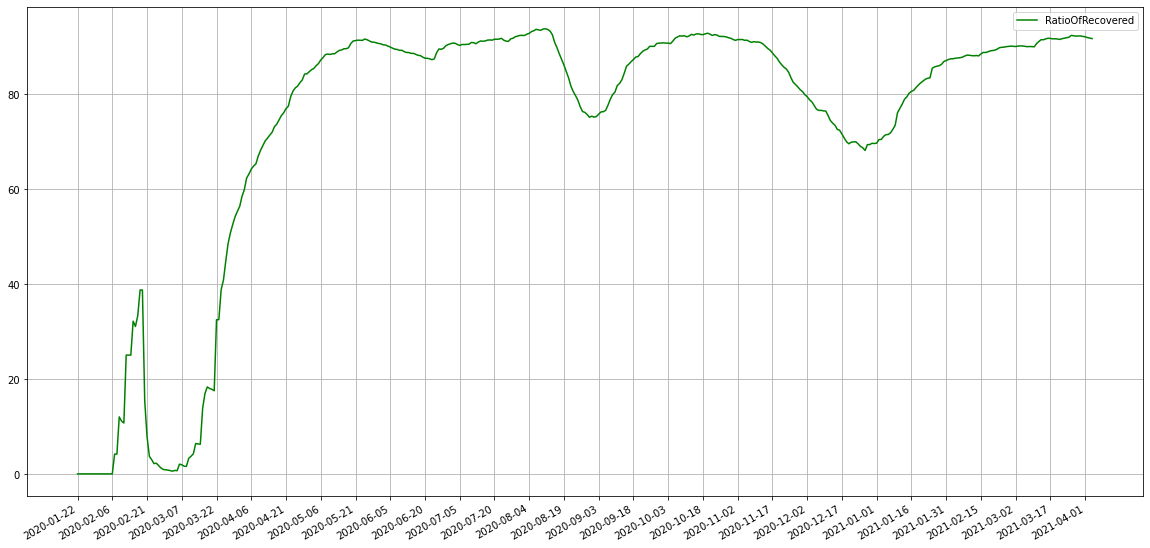

In [29]:
# 회복율에 관한 그래프
fig, axes3 = plt.subplots(figsize = (20,10))
axes3.plot(time_series_ratio['Date'],time_series_ratio['RatioOfRecovered'],color = 'green', label = 'RatioOfRecovered')
axes3.legend()
axes3.grid(True)
plt.xticks(np.arange(0,438,15))
fig.autofmt_xdate()
plt.show()

회복율이 현격히 낮아진 구간 = 대유행 시기

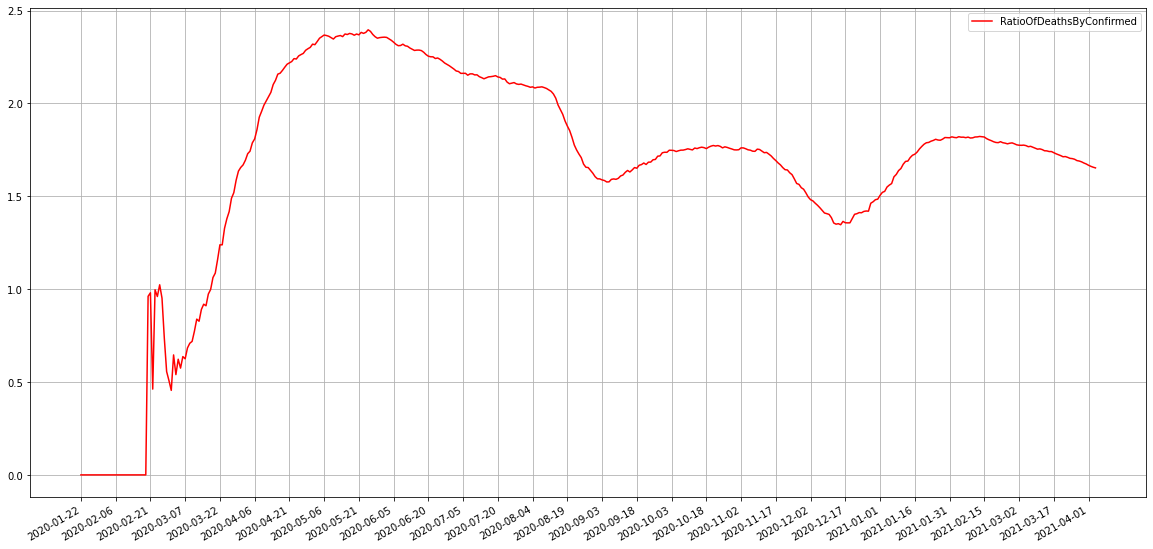

In [25]:
# 사망율에 관한 그래프
fig, axes4 = plt.subplots(figsize = (20,10))
axes4.plot(time_series_ratio['Date'],time_series_ratio['RatioOfDeaths'],color = 'red', label = 'RatioOfDeathsByConfirmed')
axes4.legend()
axes4.grid(True)
plt.xticks(np.arange(0,438,15))
fig.autofmt_xdate()
plt.show()

사망률이 높아진 시기 = 대유행 시기 이후와 일치